<div align="center">
    <h1>Linear Classifier as a Template Matching Algorithm</h1>
    <hr>
</div>

## Learning Objectives
In this notebook, you will implement a linear classifier on the CIFAR-10 dataset, but this time, we will approach the concept from a slightly different perspective. When working with image data, it can be helpful to think about linear classifiers in a more intuitive way than we did in the previous notebook. Earlier, we focused on using a linear classifier to classify data points within a feature space by identifying the best hyperplanes to separate them. However, when dealing with images, thinking about linear classifiers in terms of hyperplanes in pixel space can be difficult to visualize and understand.

Instead, we will build a new understanding of the linear classifier by looking at it as a form of *template matching*. Essentially, the classifier learns to match patterns or templates of pixels that correspond to different classes. This perspective allows us to better grasp how a linear classifier distinguishes between different image categories, making it a powerful tool for tasks like object recognition, even though it may still be a simple model compared to more advanced techniques.

You don't have to implement anything in this notebook. Feel free just to run the cells and observe the results. However, if you're interested in the code, you can check the code how the visualization is done in the `src/utils` directory. The template matching of linear classifiers is described in more detail [here](https://urob-ctu.github.io/docs/docs/classification/linear_classifier.html#linear-classifier-as-template-matching-algorithm).

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

CIFAR-10 dataset already exists


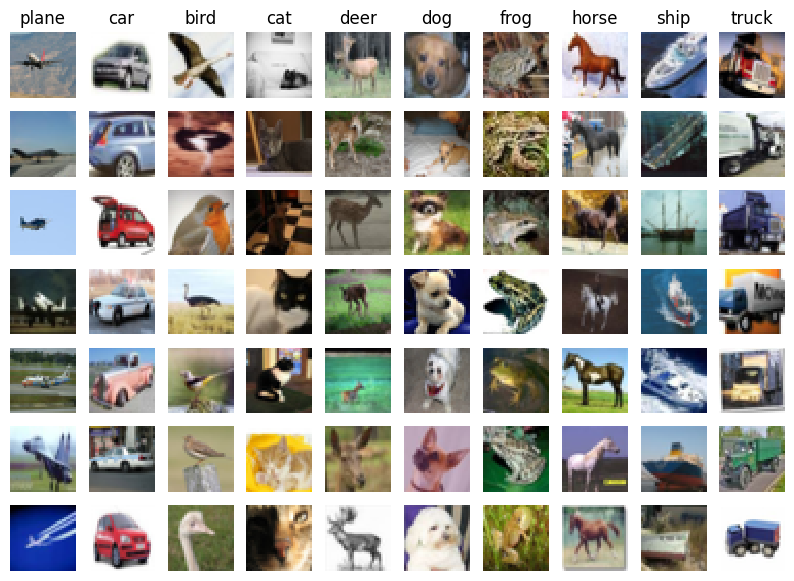

---------------- Training data ----------------
X_train shape: (45000, 32, 32, 3), y_train shape: (45000,)

---------------- Validation data ----------------
X_val shape: (5000, 32, 32, 3), y_val shape: (5000,)

---------------- Testing data ----------------
X_test shape: (10000, 32, 32, 3), y_test shape: (10000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 60000
Number of samples in training set: 45000, which is 75.00% of the dataset
Number of samples in validation set: 5000, which is 8.33% of the dataset
Number of samples in testing set: 10000, which is 16.67% of the dataset


In [2]:
import torch
from utils import load_cifar10, reshape_to_vectors, dataset_stats

# download the CIFAR-10 dataset
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10(directory='./data/datasets/CIFAR10',
                                                              visualize_samples=True)

# Print out the dataset statistics and visualize a few samples
num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Reshape the data to vectors and normalize them
X_train, X_val, X_test = reshape_to_vectors(X_train, X_val, X_test)

Training: 100%|██████████| 4000/4000 [00:05<00:00, 760.16it/s]


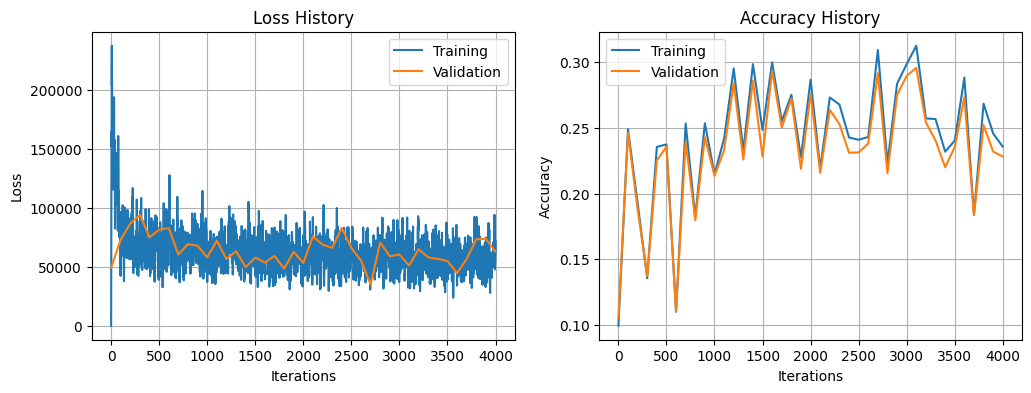

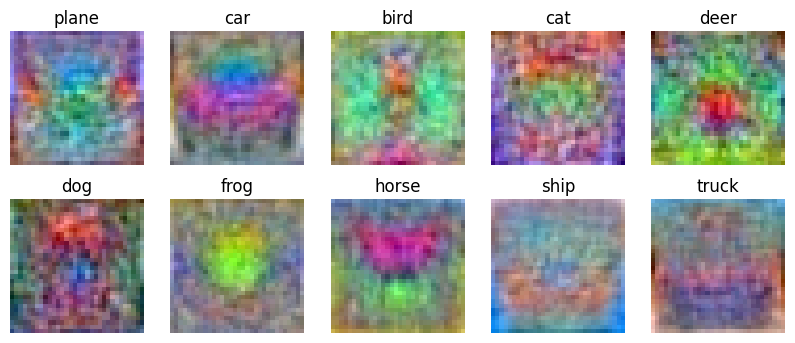

In [4]:
import torch

from assignments import LinearClassifier
from utils import plot_training, plot_weights_as_templates

torch.random.manual_seed(69)

# Create a linear classifier instance
linear_classifier = LinearClassifier(num_features=num_features,
                                       num_classes=num_classes,
                                       learning_rate=1e-2,
                                       num_iters=4000,
                                       batch_size=400)
# Train the classifier
loss_history, acc_history = linear_classifier.train(X_train, y_train, X_val, y_val)

# Visualize the training process
plot_training(loss_history, acc_history)
plot_weights_as_templates(linear_classifier.params['W'], classes)
